In [1]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


Enter the center word for brainstorming: dog
Enter 'exit' to finish the mind mapping process.
Enter 'nothing' if you want to see more suggestions.

Suggestions for 'dog':
1. bull_mastiff
2. kitten
3. Doberman_pinscher
4. puppies
5. pit_bull_mix
Choose a word by entering its number or input 'nothing' or 'exit': 4

Suggestions for 'puppies':
1. German_shepherd_puppies
2. Min_Pin
3. cats
4. Shelties
5. stray_kittens
Choose a word by entering its number or input 'nothing' or 'exit': 3

Suggestions for 'cats':
1. feral_kittens
2. Siamese_cats
3. Rottweilers
4. wolfdogs
5. pit_bulls
Choose a word by entering its number or input 'nothing' or 'exit': nothing

Suggestions for 'cats':
1. adoptable_cats
2. Feral_cats
3. canines
4. cat
5. feral_cats
Choose a word by entering its number or input 'nothing' or 'exit': 5

Suggestions for 'feral_cats':
1. stray_animals
2. trapping_neutering
3. neuter_feral_cats
4. stray_cat
5. feral_cat_populations
Choose a word by entering its number or input 'nothing

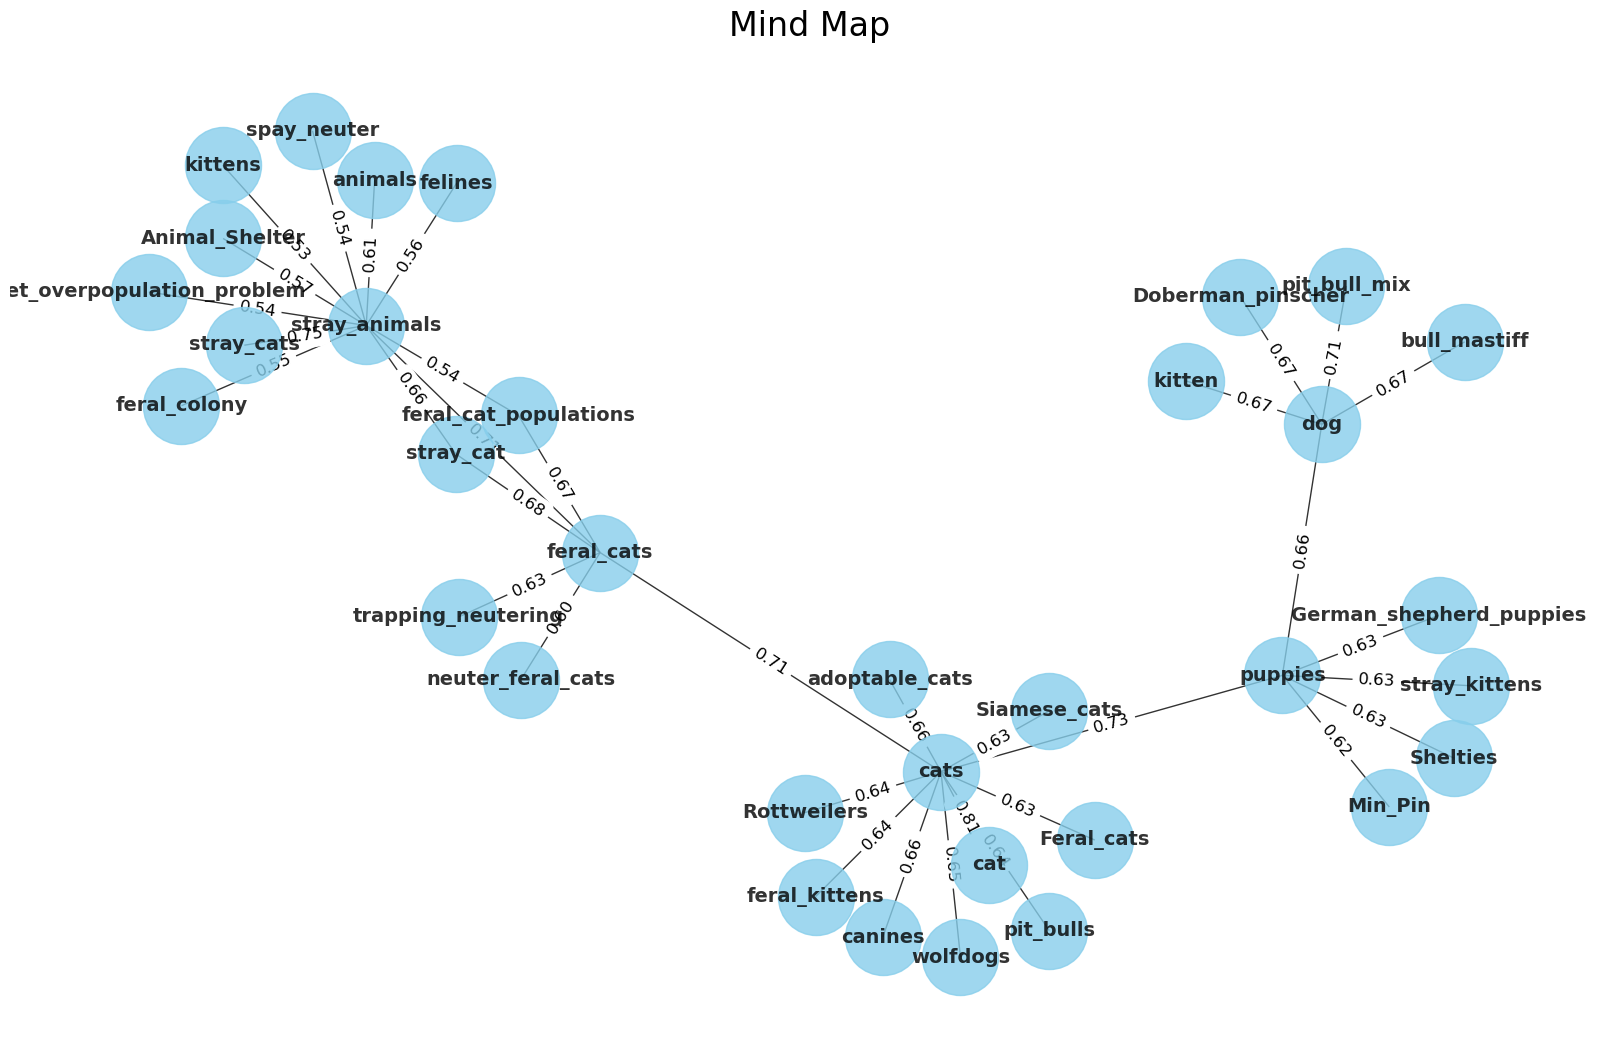

In [4]:
import gensim.downloader as api
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt

# Load pre-trained Word2Vec model
model = api.load('word2vec-google-news-300')

def most_similar_bandit(word, num_options=5, epsilon=0.1):
    similar_words = model.most_similar(positive=[word], topn=num_options*10)
    options = random.sample(similar_words, num_options)
    rewards = [0] * num_options
    counts = [0] * num_options

    for i in range(num_options):
        if random.random() < epsilon:
            choice = random.choice(range(num_options))
        else:
            choice = np.argmax(rewards)

        option = options[choice]
        counts[choice] += 1
        rewards[choice] = model.similarity(word, option[0])

    return [options[i] for i in np.argsort(rewards)[::-1]]

def draw_mind_map(graph):
    plt.figure(figsize=(16, 10))
    pos = nx.spring_layout(graph, seed=42)
    nx.draw(graph, pos, with_labels=True, node_color="skyblue", font_size=14, font_weight="bold", node_size=3000, alpha=0.8)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels={(n1, n2): f"{w:.2f}" for n1, n2, w in graph.edges(data="weight")}, font_size=12)
    plt.title("Mind Map", fontsize=24)
    plt.axis("off")
    plt.show()

def mind_mapping():
    center_word = input("Enter the center word for brainstorming: ")
    print("Enter 'exit' to finish the mind mapping process.")
    print("Enter 'nothing' if you want to see more suggestions.")
    current_word = center_word

    graph = nx.Graph()
    graph.add_node(center_word)

    while True:
        print(f"\nSuggestions for '{current_word}':")
        suggestions = most_similar_bandit(current_word)

        for i, (word, _) in enumerate(suggestions):
            print(f"{i + 1}. {word}")

            if not graph.has_node(word):
                graph.add_node(word)

            if not graph.has_edge(current_word, word):
                graph.add_edge(current_word, word, weight=suggestions[i][1])

        choice = input("Choose a word by entering its number or input 'nothing' or 'exit': ").strip()

        if choice.lower() == "exit":
            break
        elif choice.lower() == "nothing":
            continue

        try:
            index = int(choice) - 1
            current_word = suggestions[index][0]
        except (ValueError, IndexError):
            print("Invalid input. Please try again.")

    return graph

if __name__ == "__main__":
    mind_map = mind_mapping()
    draw_mind_map(mind_map)